In [1]:
import numpy as np
import cv2
from PIL import Image, ImageDraw
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
IMAGE_SHAPE = (400, 400)

(3000, 1997)
0


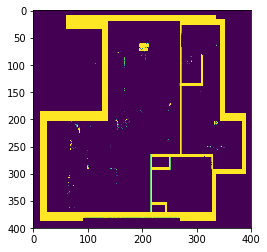

In [3]:
# image gathering
image_url = "https://www.estate-eu.com/images/statji/chto-takoe-1kk-i-kakie-v-chehii-planirovki-kvartir.jpg"

def read_image_from_url(im_url):
    response = requests.get(im_url, stream=True).raw
    return Image.open(response)

def rgb2bw_coverter(im):
    gray = im.convert('L')
    bw = gray.point(lambda x: 255 if x<30 else 0)
    return bw

img = read_image_from_url(image_url)
img_arr = np.asarray(img)
img_arr = cv2.resize(img_arr, IMAGE_SHAPE)
print(img.size)

img_bw = rgb2bw_coverter(img)
bw_arr = np.asarray(img_bw)
bw_arr = cv2.resize(bw_arr, IMAGE_SHAPE)

plt.imshow(bw_arr)
print(np.min(img_bw))

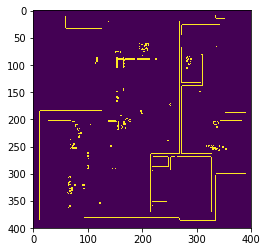

In [13]:
gray = cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY) 
blurred_image = cv2.GaussianBlur(gray, (9, 9), 0)
edges = cv2.Canny(bw_arr,10,120,apertureSize = 3) 
plt.imshow(edges)

[[ 61   9 333   9]]


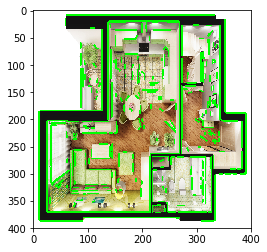

In [14]:
# detect lines
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img_arr,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img_arr)
print(lines[1])

In [61]:
print(lines[2,0])
print(lines[1,0])
print(len(lines))
slopes = []

def is_parallel(line1, line2):
    # slope = (line[3] - line[1])/(line[2] - line[0])
    return (line2[3] - line1[1])*(line2[2] - line2[0]) == (line2[3] - line2[1])*(line1[2] - line1[0])

print(is_parallel(lines[2, 0], lines[1,0]))

parallel_lines = []

for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        if is_parallel(lines[i, 0], lines[j, 0]) and is_added_ith !=1:
            parallel_lines.append(lines[i, 0])
            is_added_ith = 1
    is_added_ith = 0
print(parallel_lines)
print(len(parallel_lines))
print()

[268 263 268  21]
[ 61   9 333   9]
20
False
[array([268, 263, 268,  21], dtype=int32), array([272, 263, 272, 139], dtype=int32), array([ 11, 385,  11, 186], dtype=int32), array([343, 201, 343,  27], dtype=int32), array([137, 201, 137,  22], dtype=int32), array([352, 187, 352,  16], dtype=int32), array([ 25, 369,  25, 204], dtype=int32), array([126, 184, 126,  34], dtype=int32), array([390, 300, 390, 189], dtype=int32), array([327, 370, 327, 269], dtype=int32), array([215, 369, 215, 264], dtype=int32)]
11



In [48]:
img2 = img = read_image_from_url(image_url)
for x in range(0, len(parallel_lines)):
    for x1,y1,x2,y2 in parallel_lines[x]:
        cv2.line(img_arr,(x1,y1),(x2,y2),(0,255,0),2)

TypeError: 'numpy.int32' object is not iterable

In [11]:
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 100*(-b))
            y1 = int(y0 + 100*(a))
            x2 = int(x0 - 100*(-b))
            y2 = int(y0 - 100*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, a=0.8, b=1., l=0.):
    return cv2.addWeighted(initial_img, a, img, b, l)    


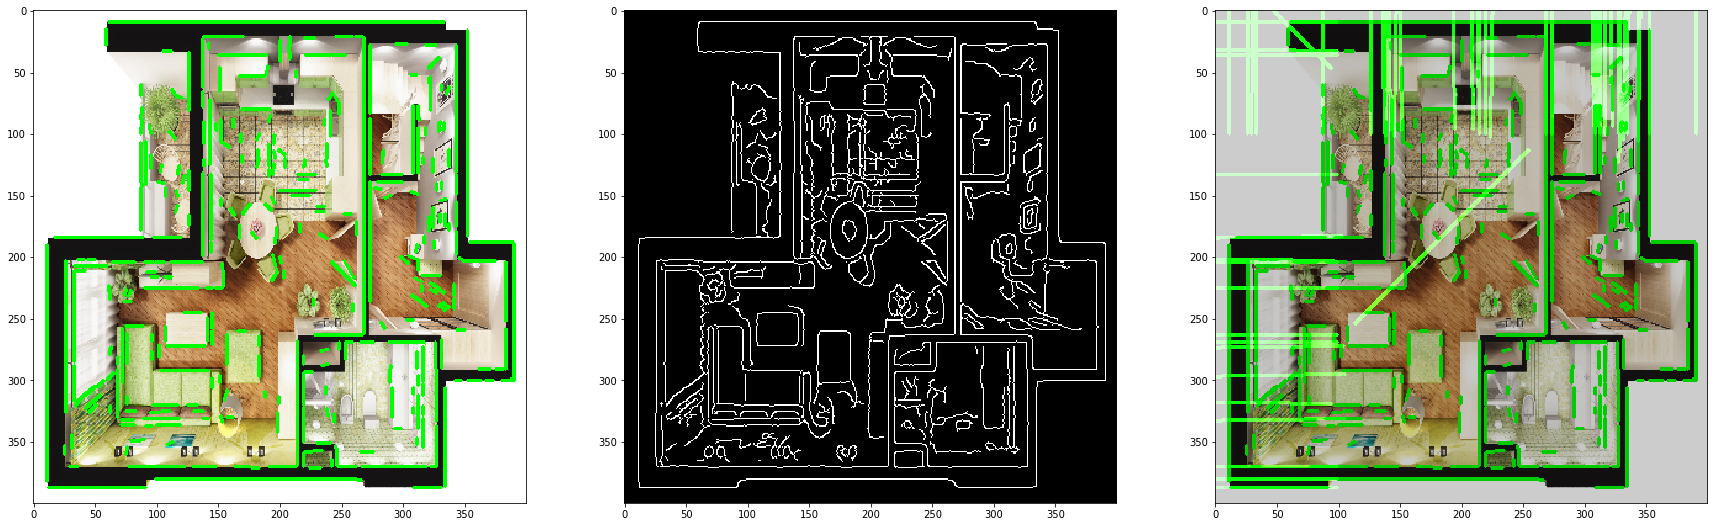

In [12]:
img_arr2 = img_arr

rho_resolution = 1
theta_resolution = np.pi/180
threshold = 90

hough_lines = cv2.HoughLines(edges, rho_resolution , theta_resolution , threshold)

        
hough_lines_image = np.zeros_like(img_arr2)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,img_arr2)

plt.figure(figsize = (30,20))
plt.subplot(131)
plt.imshow(img_arr2)
plt.subplot(132)
plt.imshow(edges, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 
plt.show()



In [109]:
#print(lines)

In [ ]:
# detect walls


def line_paralel():
    pass

def detect_walls(init_image, lines):
    pass